In [ ]:
# !rm -rf save_inference_result_2Learnable_BPGNN_Transformer_GRUGCN save_inference_result_2Learnable_BPGNN_Transformer_GRUGCN.zip
!rm -rf save_inference_result/
!unzip  save_inference_result_Temporal_Updated_Models.zip

Archive:  save_inference_result_Temporal_Updated_Models.zip
   creating: save_inference_result/
   creating: save_inference_result/VAR_60mins_25Nodes/
  inflating: save_inference_result/VAR_60mins_25Nodes/y.npy  
  inflating: save_inference_result/VAR_60mins_25Nodes/metrics.csv  
  inflating: save_inference_result/VAR_60mins_25Nodes/y_hat_VARModel.npy  
 extracting: save_inference_result/VAR_60mins_25Nodes/agg_metrics.csv  
   creating: save_inference_result/GRU_30mins_16Nodes/
  inflating: save_inference_result/GRU_30mins_16Nodes/y.npy  
  inflating: save_inference_result/GRU_30mins_16Nodes/metrics.csv  
 extracting: save_inference_result/GRU_30mins_16Nodes/agg_metrics.csv  
  inflating: save_inference_result/GRU_30mins_16Nodes/y_hat_RNNModel.npy  
   creating: save_inference_result/VAR_30mins_16Nodes/
  inflating: save_inference_result/VAR_30mins_16Nodes/y.npy  
  inflating: save_inference_result/VAR_30mins_16Nodes/metrics.csv  
  inflating: save_inference_result/VAR_30mins_16Nodes/y

In [ ]:
import os, re
import pandas as pd

base_dir = "save_inference_result"

# Initialize dictionary to store results
temporal_metrics_dict = {}

# New pattern to capture:
#  - model      : word characters (e.g. TGCN)
#  - redundancy : digits before the literal '%'
#  - sampling   : digits before the literal 'mins'
#  - method     : word characters (e.g. pearson, euclidean)
#  - nodes      : digits before the literal 'Nodes'
pattern = re.compile(
    r'^(?P<model>\w+?)_'           # model name
    r'(?P<sampling>\d+)mins_'      # e.g. "60mins"
    r'(?P<nodes>\d+)Nodes$'        # e.g. "8Nodes"
)

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    m = pattern.match(folder)
    if not m:
        print(f"Skipping unexpected folder name: {folder}")
        continue

    info = m.groupdict()
    model     = info['model']
    sampling  = int(info['sampling'])
    nodes     = int(info['nodes'])


    # Metrics file inside each folder
    csv_path = os.path.join(folder_path, f"metrics.csv")
    if not os.path.exists(csv_path):
        print(f"  No metrics.csv in {folder}")
        continue

    df = pd.read_csv(csv_path, header=None, names=['Metric','Value'])
    # Build a small dict of the three error types
    values = df.set_index('Metric')['Value'].to_dict()

    temporal_metrics_dict[folder] = {
        'model':      model,
        'sampling':   sampling,
        'nodes':      nodes,
        'MAE':        float(values.get('MAE',  float('nan'))),
        'MAPE':       float(values.get('MAPE', float('nan'))),
        'RMSE':       float(values.get('RMSE', float('nan'))),
    }

# Example: inspect one entry
temporal_metrics_dict

{'VAR_5mins_8Nodes': {'model': 'VAR',
  'sampling': 5,
  'nodes': 8,
  'MAE': 2.4753504,
  'MAPE': 0.23217852,
  'RMSE': 3.4810102},
 'Transformer_60mins_16Nodes': {'model': 'Transformer',
  'sampling': 60,
  'nodes': 16,
  'MAE': 2.639256,
  'MAPE': 0.23240638,
  'RMSE': 3.5262148},
 'Transformer_5mins_25Nodes': {'model': 'Transformer',
  'sampling': 5,
  'nodes': 25,
  'MAE': 2.1538017,
  'MAPE': 0.1965798,
  'RMSE': 3.3116581},
 'VAR_45mins_8Nodes': {'model': 'VAR',
  'sampling': 45,
  'nodes': 8,
  'MAE': 2.5887983,
  'MAPE': 0.23774126,
  'RMSE': 3.430956},
 'VAR_15mins_16Nodes': {'model': 'VAR',
  'sampling': 15,
  'nodes': 16,
  'MAE': 2.1462789,
  'MAPE': 0.21713258,
  'RMSE': 3.0368989},
 'VAR_45mins_25Nodes': {'model': 'VAR',
  'sampling': 45,
  'nodes': 25,
  'MAE': 1.9517808,
  'MAPE': 0.19378178,
  'RMSE': 2.7437122},
 'VAR_60mins_16Nodes': {'model': 'VAR',
  'sampling': 60,
  'nodes': 16,
  'MAE': 2.5264058,
  'MAPE': 0.23266102,
  'RMSE': 3.3309965},
 'VAR_60mins_25Nodes

For GCN Models

In [ ]:
import os, re
import pandas as pd

base_dir = "save_inference_result"

# Initialize dictionary to store results
metrics_dict = {}

# New pattern to capture:
#  - model      : word characters (e.g. TGCN)
#  - redundancy : digits before the literal '%'
#  - sampling   : digits before the literal 'mins'
#  - method     : word characters (e.g. pearson, euclidean)
#  - nodes      : digits before the literal 'Nodes'
pattern = re.compile(
    r'^(?P<model>\w+?)_'           # model name
    r'(?P<redundancy>\d+)%_'       # e.g. "20%"
    r'(?P<sampling>\d+)mins_'      # e.g. "60mins"
    r'(?P<method>\w+?)_'           # e.g. "pearson" or "euclidean"
    r'(?P<nodes>\d+)Nodes$'        # e.g. "8Nodes"
)

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    m = pattern.match(folder)
    if not m:
        print(f"Skipping unexpected folder name: {folder}")
        continue

    info = m.groupdict()
    model     = info['model']
    redundancy= int(info['redundancy'])
    sampling  = int(info['sampling'])
    method    = info['method']
    nodes     = int(info['nodes'])


    # Metrics file inside each folder
    csv_path = os.path.join(folder_path, f"{method}/metrics.csv")
    if not os.path.exists(csv_path):
        print(f"  No metrics.csv in {folder}")
        continue

    df = pd.read_csv(csv_path, header=None, names=['Metric','Value'])
    # Build a small dict of the three error types
    values = df.set_index('Metric')['Value'].to_dict()

    metrics_dict[folder] = {
        'model':      model,
        'redundancy': redundancy,
        'sampling':   sampling,
        'method':     method,
        'nodes':      nodes,
        'MAE':        float(values.get('MAE',  float('nan'))),
        'MAPE':       float(values.get('MAPE', float('nan'))),
        'RMSE':       float(values.get('RMSE', float('nan'))),
    }

# Example: inspect one entry
metrics_dict

{'TGCN_40%_45mins_euclidean_16Nodes': {'model': 'TGCN',
  'redundancy': 40,
  'sampling': 45,
  'method': 'euclidean',
  'nodes': 16,
  'MAE': 2.015888,
  'MAPE': 0.1944138,
  'RMSE': 2.8390033},
 'TGCN_40%_5mins_pearson_25Nodes': {'model': 'TGCN',
  'redundancy': 40,
  'sampling': 5,
  'method': 'pearson',
  'nodes': 25,
  'MAE': 2.4137137,
  'MAPE': 0.21599676,
  'RMSE': 3.6373303},
 'GRUGCN_100%_5mins_pearson_8Nodes': {'model': 'GRUGCN',
  'redundancy': 100,
  'sampling': 5,
  'method': 'pearson',
  'nodes': 8,
  'MAE': 2.7061987,
  'MAPE': 0.23554969,
  'RMSE': 3.7673502},
 'GRUGCN_60%_45mins_pearson_8Nodes': {'model': 'GRUGCN',
  'redundancy': 60,
  'sampling': 45,
  'method': 'pearson',
  'nodes': 8,
  'MAE': 2.2716227,
  'MAPE': 0.21632789,
  'RMSE': 2.9948869},
 'TGCN_40%_60mins_euclidean_8Nodes': {'model': 'TGCN',
  'redundancy': 40,
  'sampling': 60,
  'method': 'euclidean',
  'nodes': 8,
  'MAE': 3.1924922,
  'MAPE': 0.27208444,
  'RMSE': 4.1274924},
 'TGCN_40%_30mins_pearso

In [ ]:
len(metrics_dict)
tgcn_metrics = {k:v for k,v in metrics_dict.items() if v['model']=='TGCN'}
len(tgcn_metrics)

180

# Temporal Models Graphs

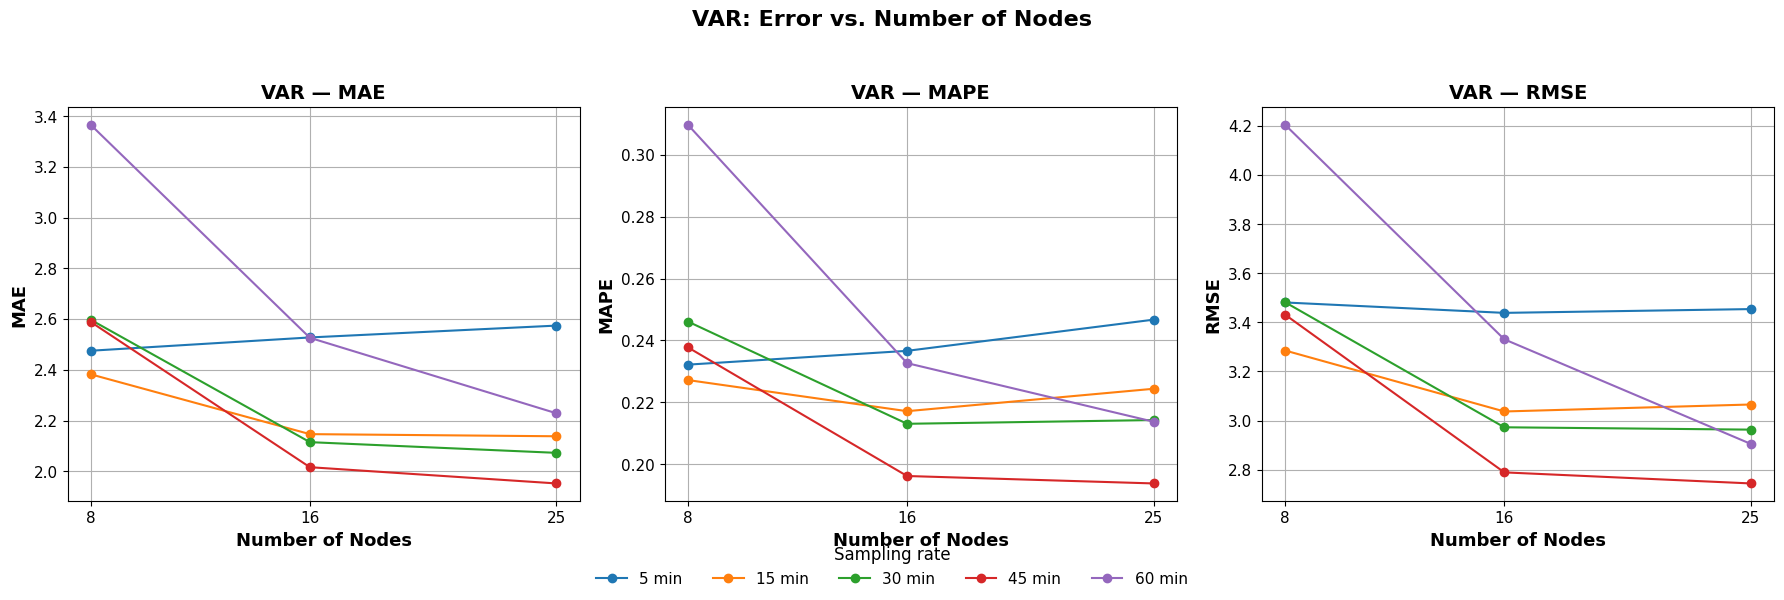

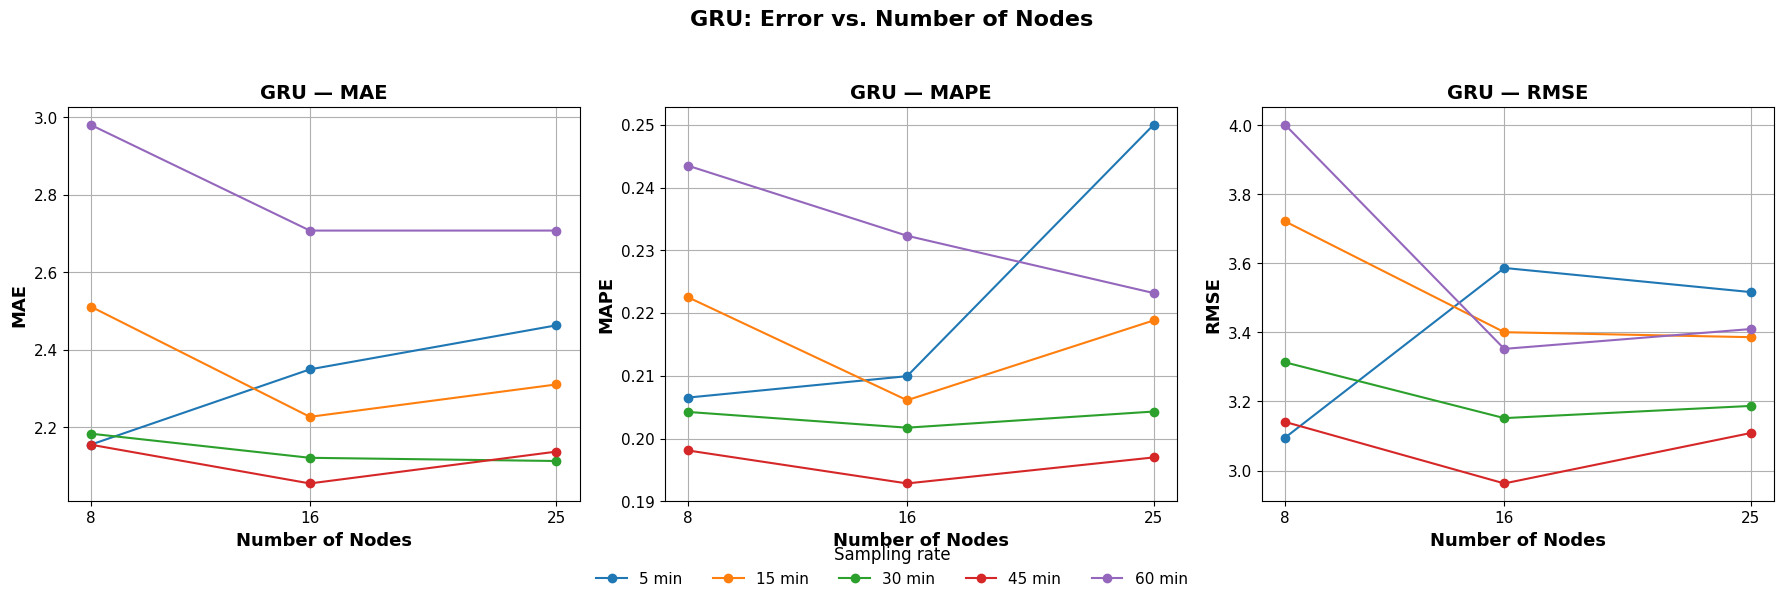

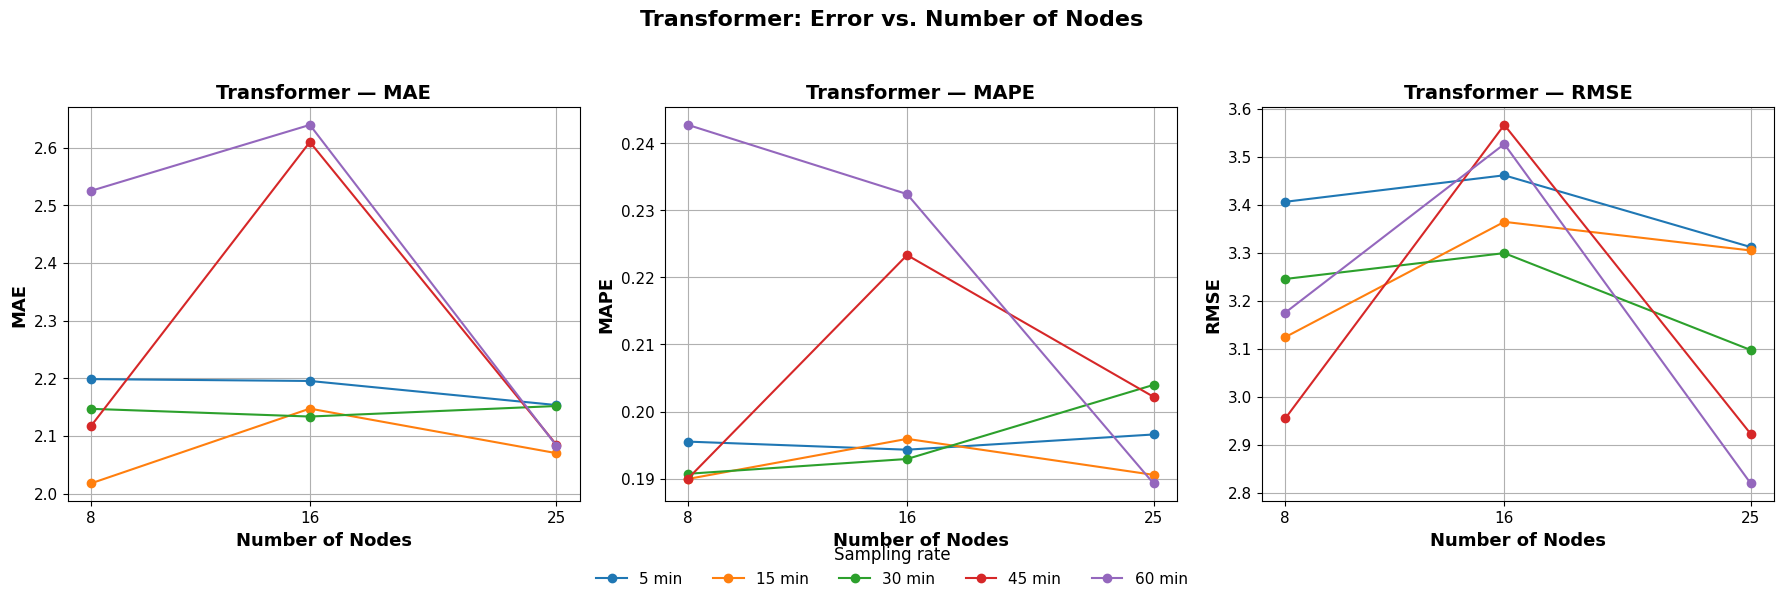

In [ ]:
import matplotlib.pyplot as plt

# 1) Parameters
sampling_rates = [5, 15, 30, 45, 60]
error_types    = ['MAE', 'MAPE', 'RMSE']
models         = ['VAR', 'GRU', 'Transformer']

# 2) Color‐map for sampling rates
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
sampling_to_color = {s: default_colors[i % len(default_colors)]
                     for i, s in enumerate(sampling_rates)}

# 3) Extract sorted node‐counts
node_counts = sorted({
    int(k.split('_')[-1].replace('Nodes', ''))
    for k in metrics_dict
})

# 4) Global style (optional)
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 13,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
})

# 5) Plotting
for model in models:
    fig, axes = plt.subplots(1, len(error_types), figsize=(18, 6))

    for ax, error in zip(axes, error_types):
        for s in sampling_rates:
            y_vals = [
                metrics_dict.get(f"{model}_{s}mins_{nodes}Nodes", {}).get(error, float('nan'))
                for nodes in node_counts
            ]
            ax.plot(node_counts, y_vals,
                    marker='o', linestyle='-',
                    color=sampling_to_color[s],
                    label=f'{s} min')

        ax.set_title(f'{model} — {error}', fontweight='bold')
        ax.set_xlabel('Number of Nodes', fontweight='bold')
        ax.set_ylabel(error, fontweight='bold')
        ax.set_xticks(node_counts)
        ax.grid(True)

    # Shared legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels,
               loc='lower center',
               ncol=len(sampling_rates),
               frameon=False,
               title='Sampling rate',
               title_fontsize=12)

    fig.suptitle(f'{model}: Error vs. Number of Nodes',
                 fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


# TGCN Model Graphs

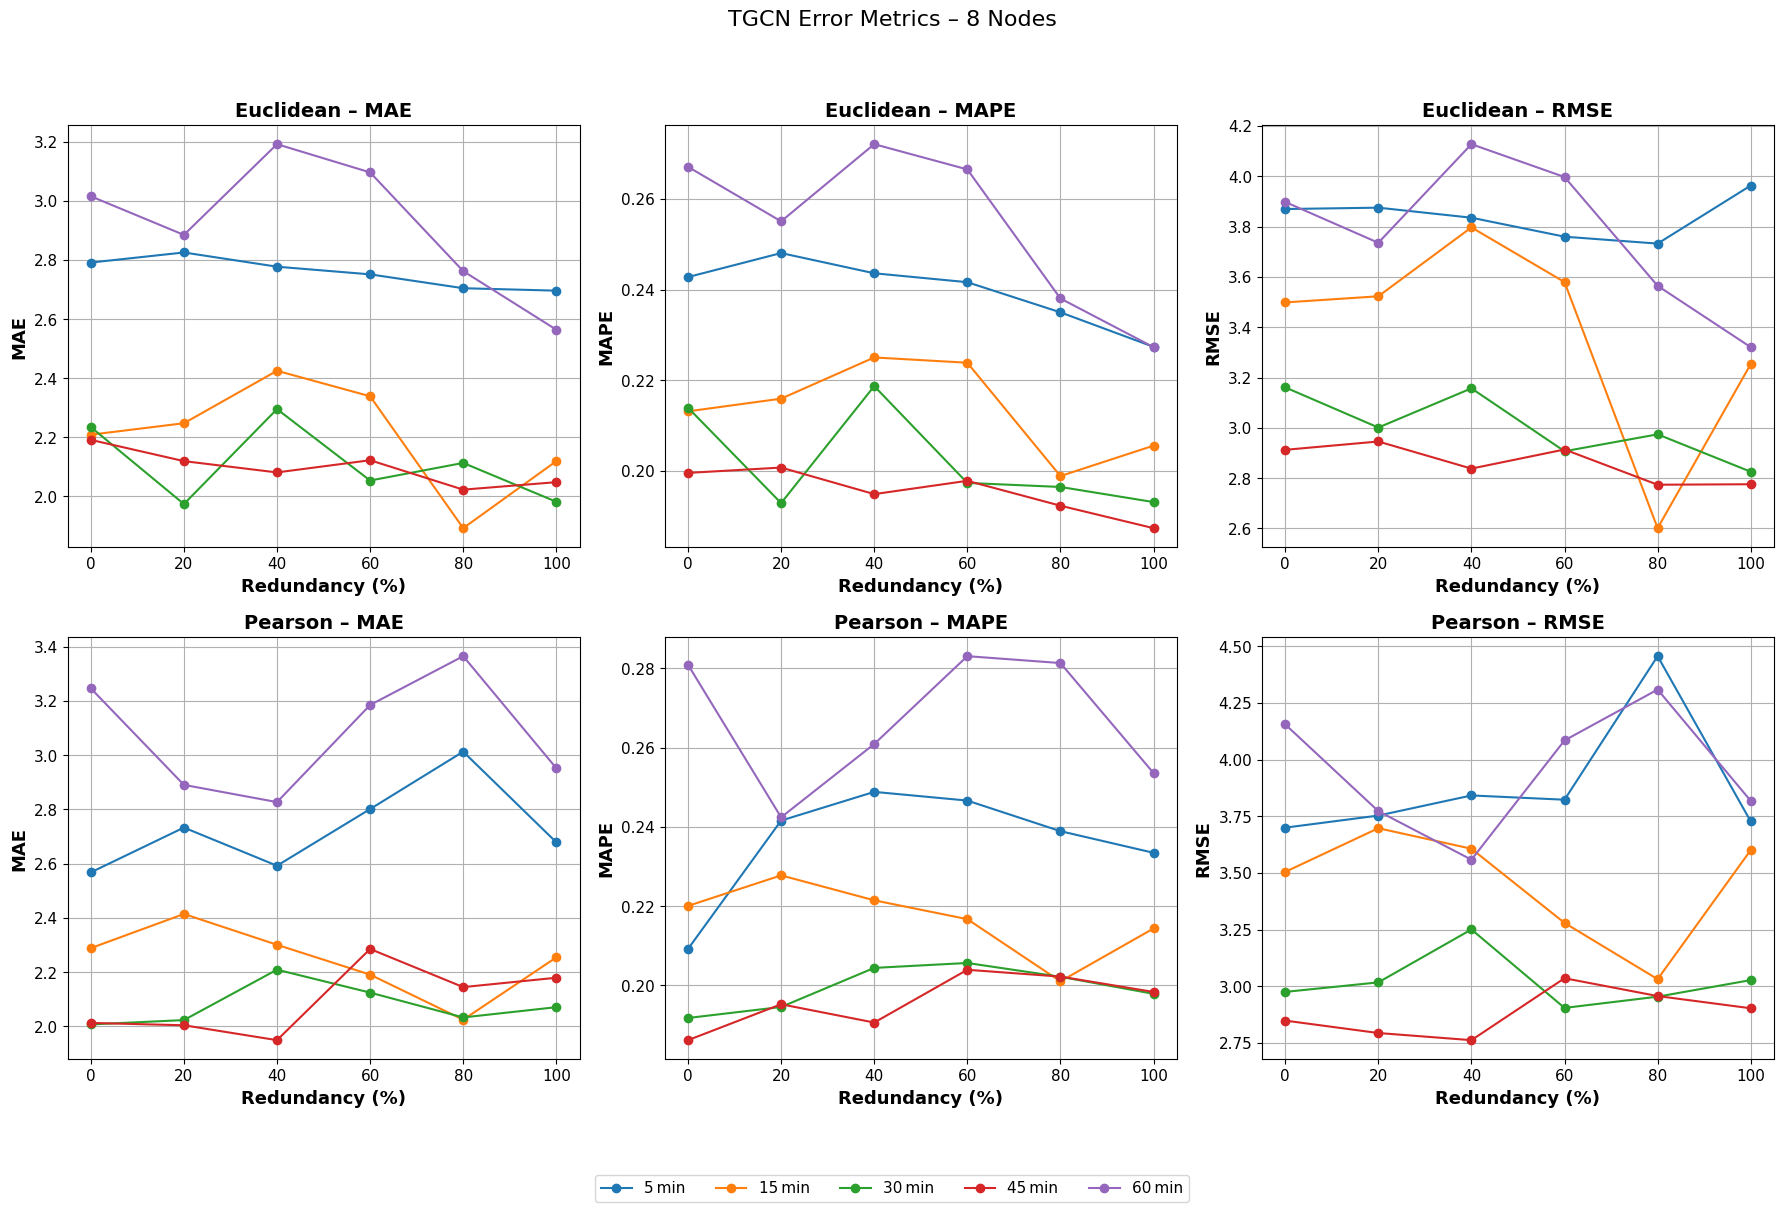

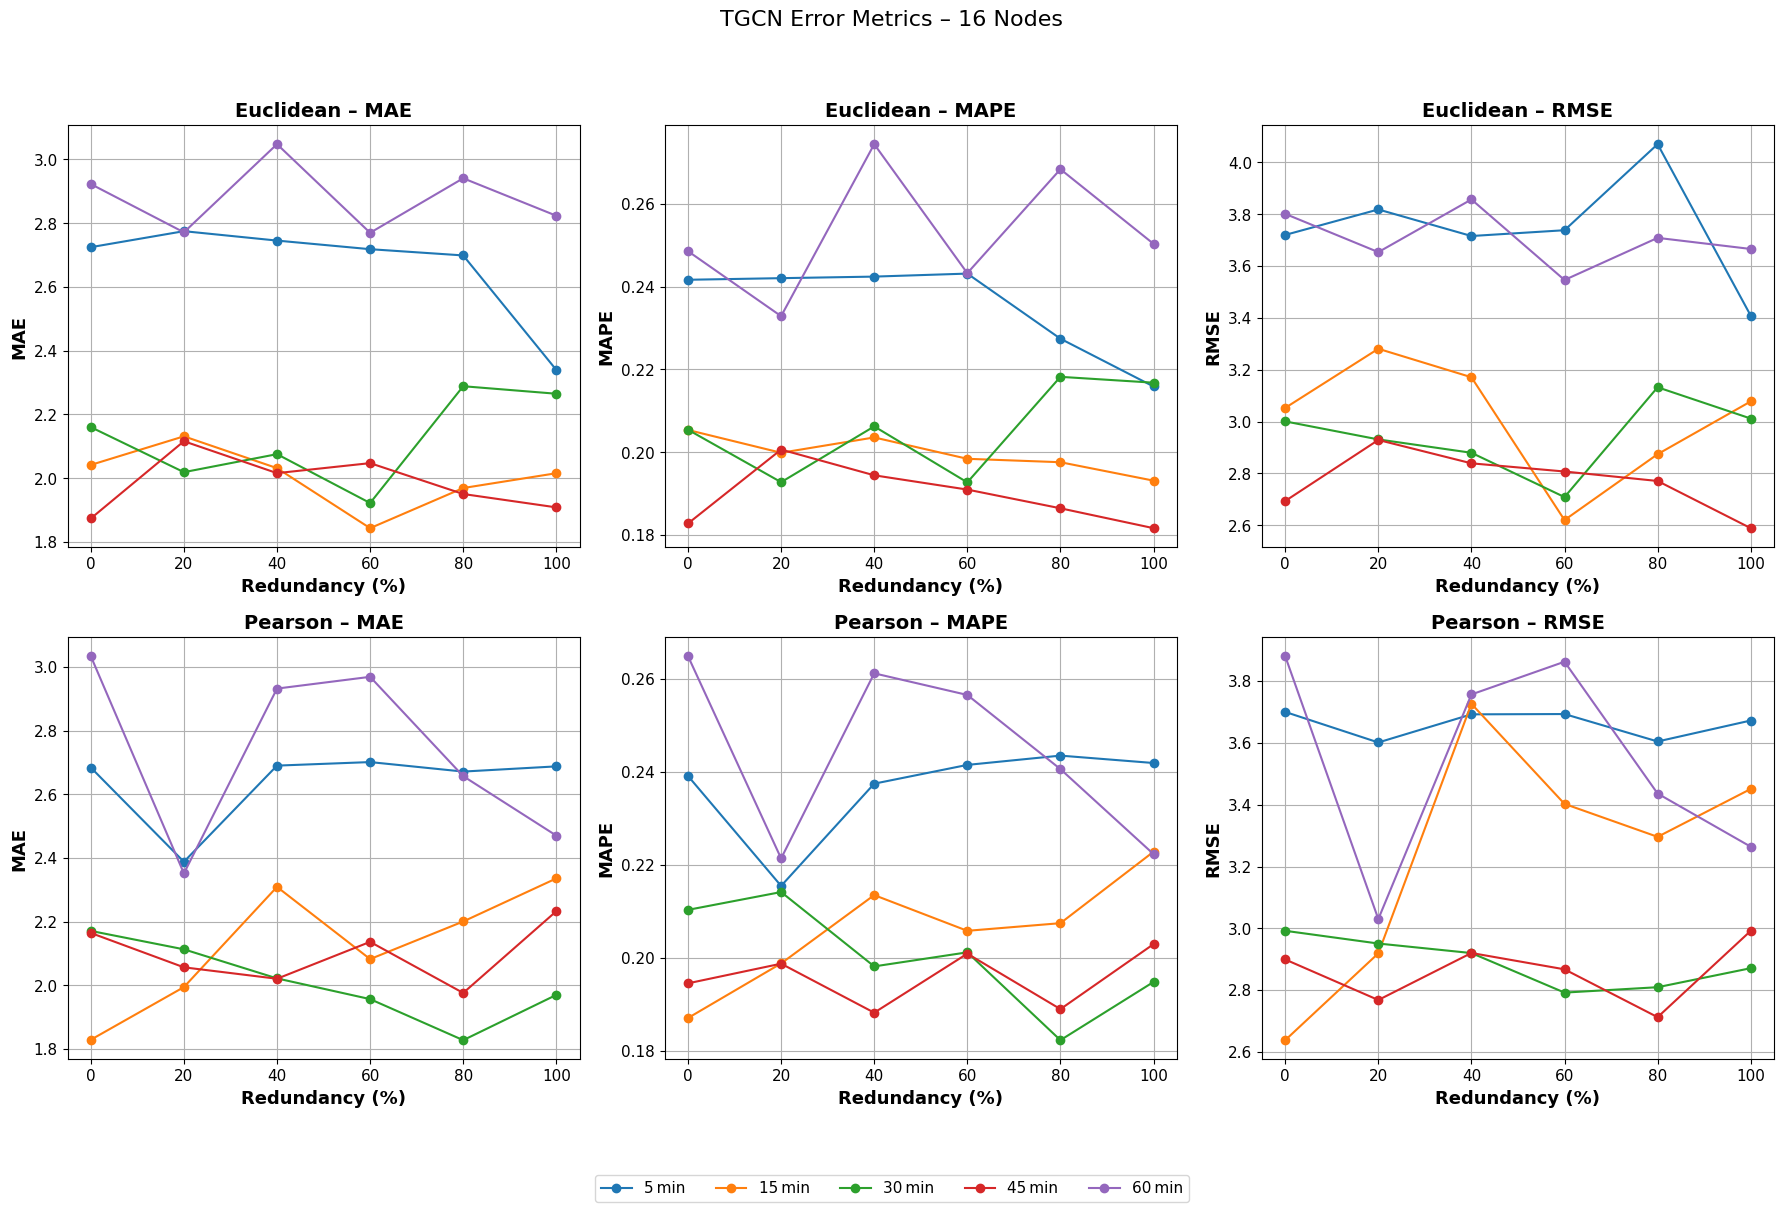

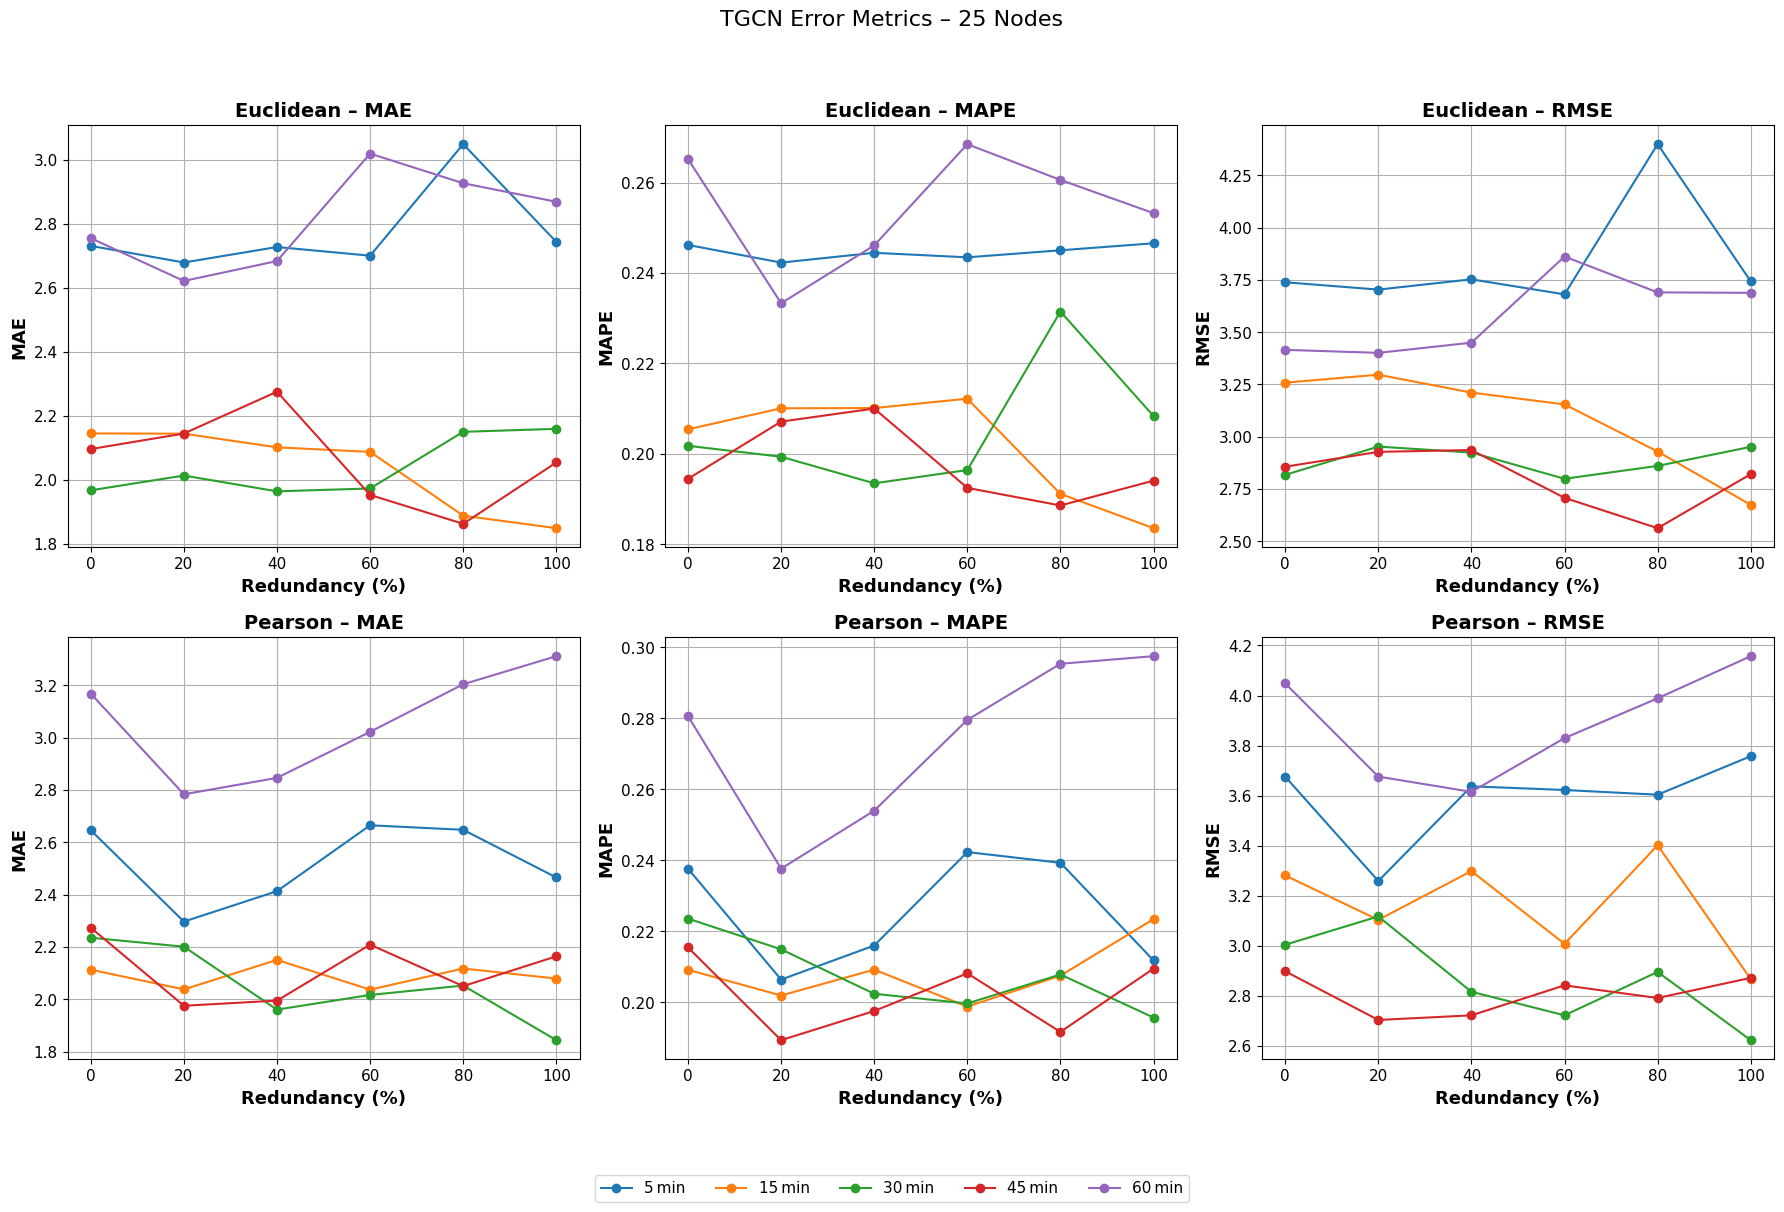

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Define parameters
sampling_rates = [5, 15, 30, 45, 60]
error_types    = ['MAE', 'MAPE', 'RMSE']
metric_types   = ['euclidean', 'pearson']

# color map for sampling rates
default_colors     = plt.rcParams['axes.prop_cycle'].by_key()['color']
sampling_to_color  = {s: default_colors[i % len(default_colors)]
                      for i, s in enumerate(sampling_rates)}

# figure‐out which node‐counts are present
# assumes keys like 'TGCN_0%_60mins_euclidean_8Nodes'
node_counts = sorted({
    int(k.split('_')[-1].replace('Nodes',''))
    for k in tgcn_metrics.keys()
})

for nodes in node_counts:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    for row_idx, metric_type in enumerate(metric_types):
        # filter out only this metric *and* this node‐count
        subset = {
            k: v for k, v in tgcn_metrics.items()
            if v['model']=='TGCN'
              and v['method']==metric_type
              and (int(v.get('Nodes',
                            k.split('_')[-1].replace('Nodes','')))
                   == nodes)
        }

        for col_idx, error in enumerate(error_types):
            ax = axes[row_idx, col_idx]

            # for each sampling rate, pull (redundancy, error)
            for s in sampling_rates:
                pts = [
                    (int(v['redundancy']), v[error])
                    for k,v in subset.items()
                    if int(v['sampling']) == s
                ]
                if not pts:
                    continue
                # sort by redundancy
                pts.sort(key=lambda x: x[0])
                x_vals, y_vals = zip(*pts)

                ax.plot(x_vals, y_vals,
                        marker='o',
                        color=sampling_to_color[s],
                        label=f'{s} min')

            ax.set_xlabel('Redundancy (%)')
            ax.set_ylabel(error)
            ax.set_title(f"{metric_type.capitalize()} – {error}")
            ax.grid(True)

    # shared legend
    legend_elems = [
        mlines.Line2D([], [], marker='o',
                      color=sampling_to_color[s],
                      linestyle='-',
                      label=f'{s} min')
        for s in sampling_rates
    ]
    fig.legend(handles=legend_elems,
               loc='lower center',
               ncol=len(sampling_rates),
               bbox_to_anchor=(0.5, -0.02))
    fig.suptitle(f'TGCN Error Metrics – {nodes} Nodes', fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


#GRUGCN Model Graphs

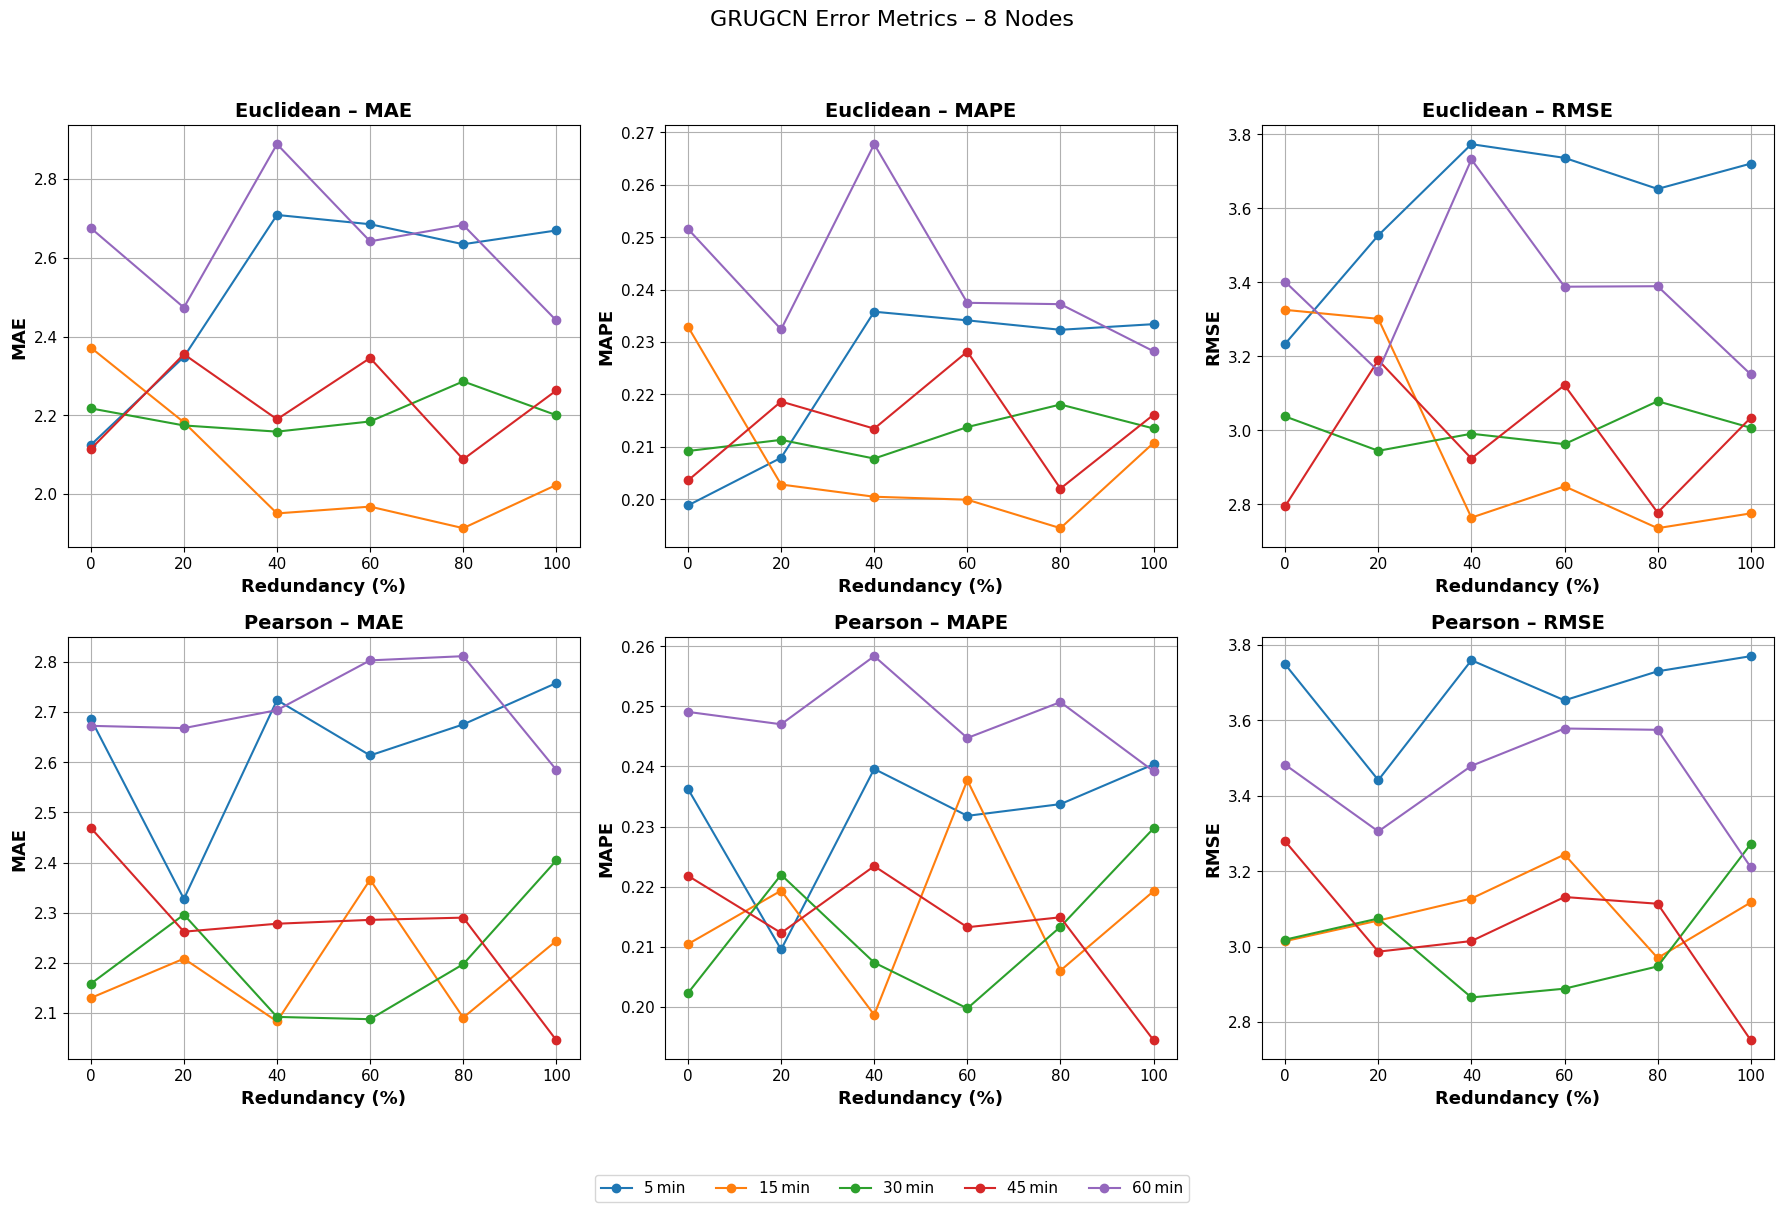

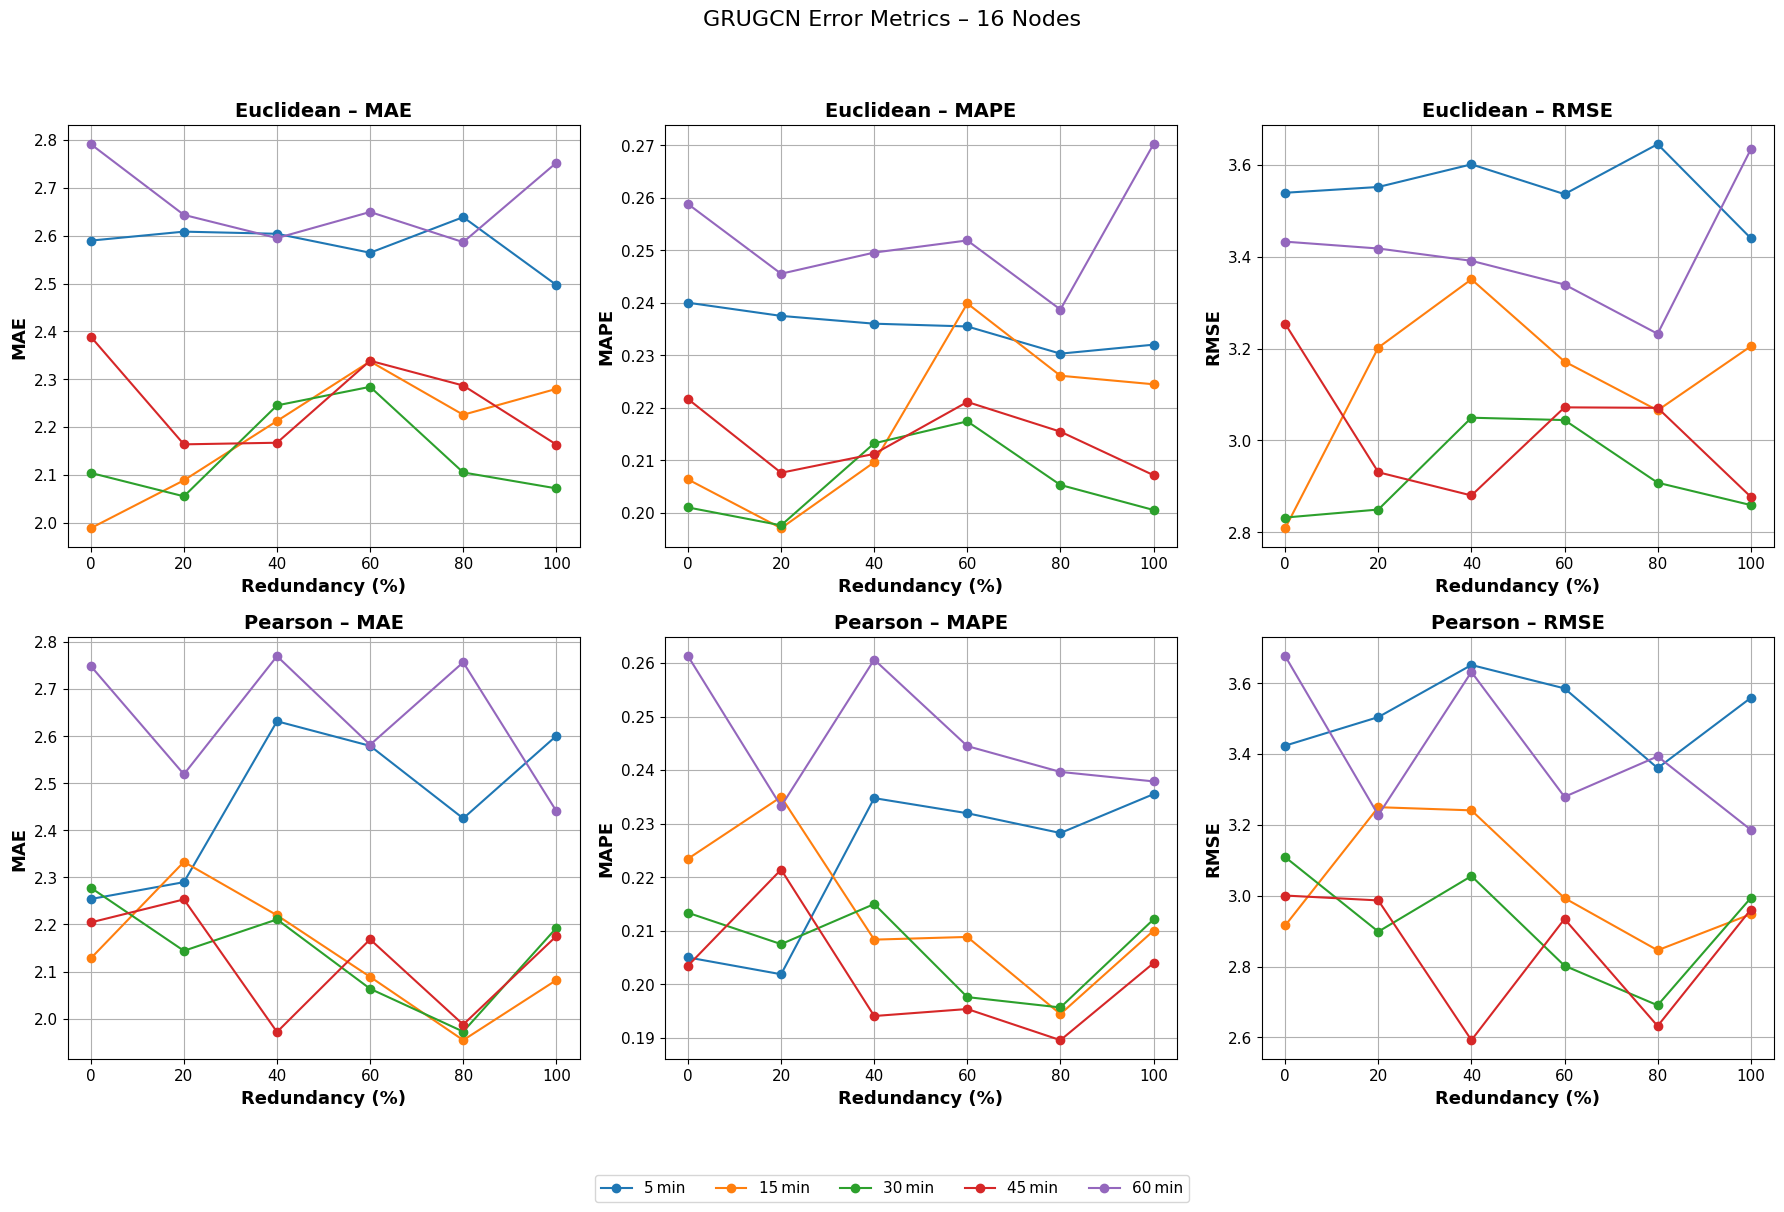

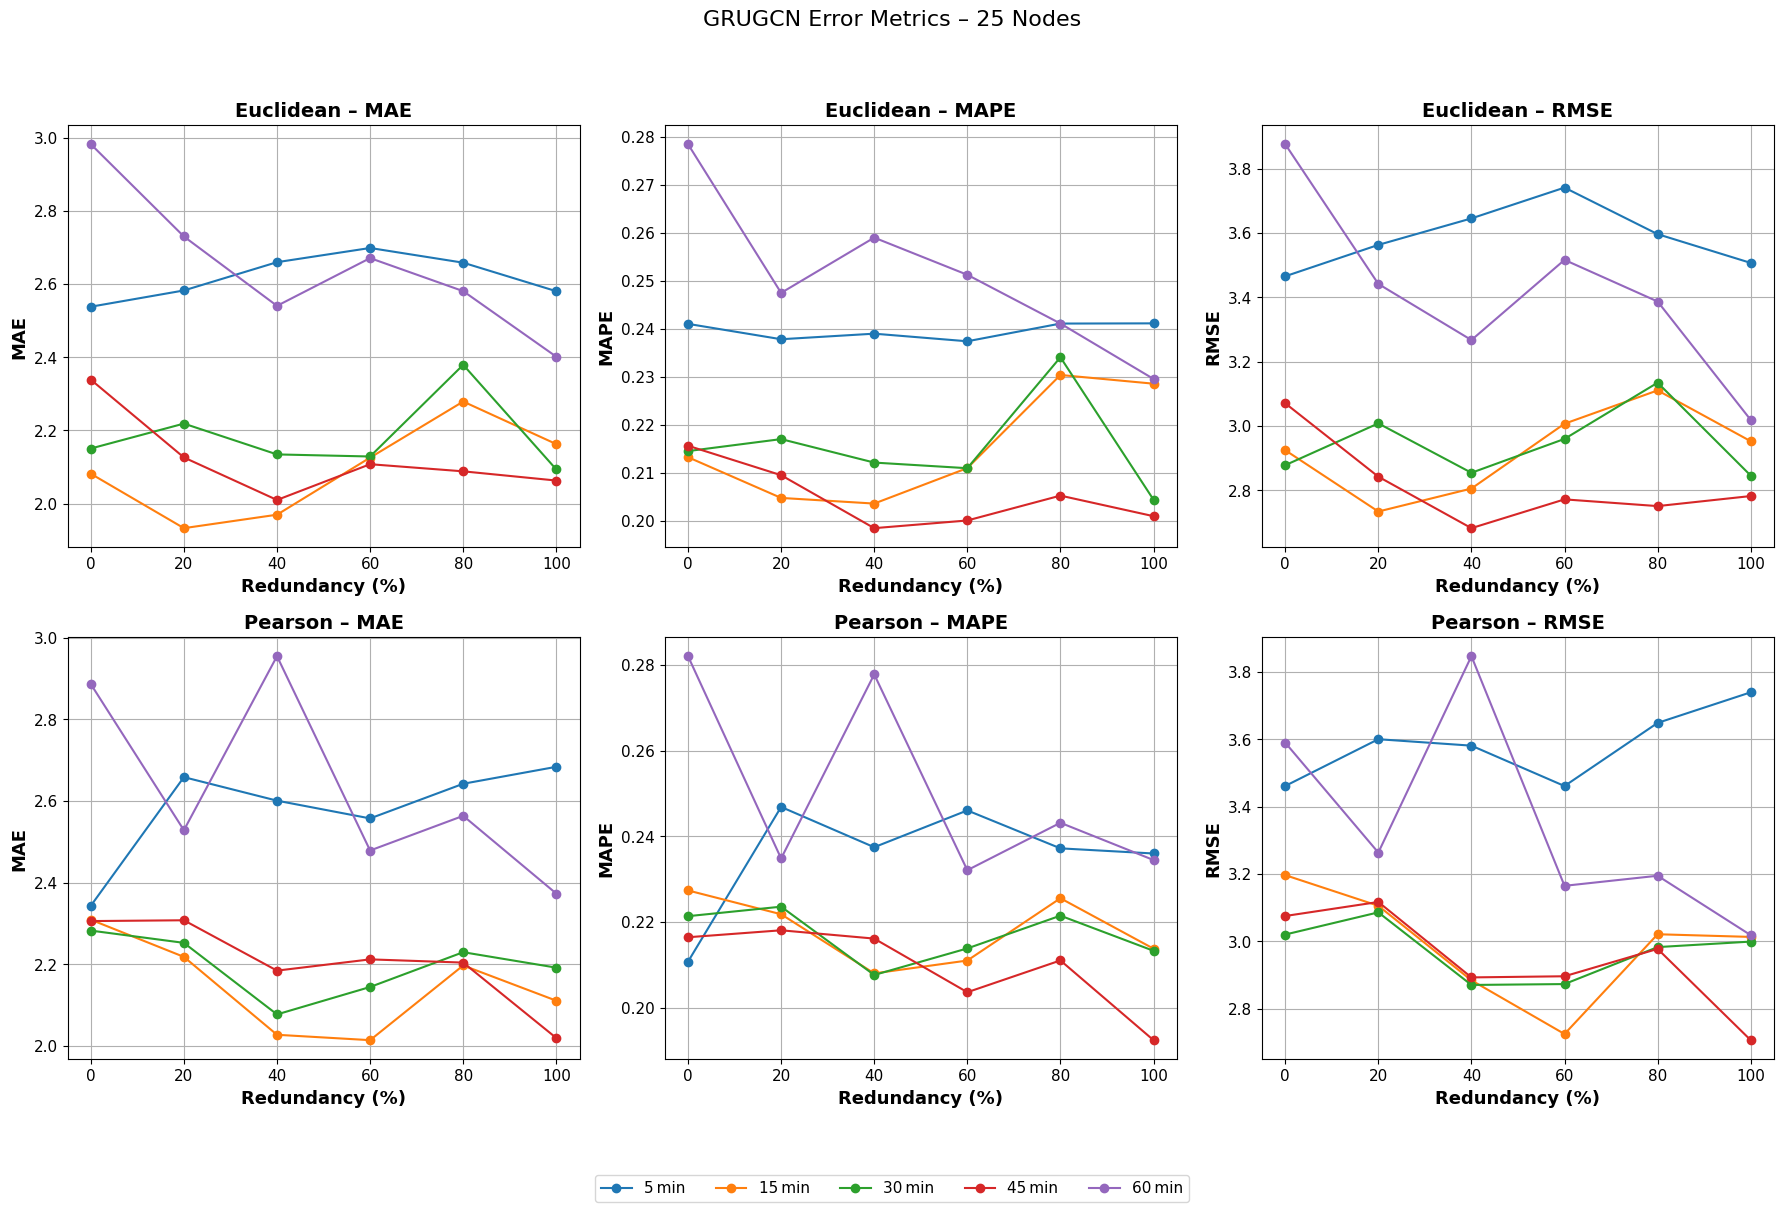

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Define parameters
sampling_rates = [5, 15, 30, 45, 60]
error_types    = ['MAE', 'MAPE', 'RMSE']
metric_types   = ['euclidean', 'pearson']

# color map for sampling rates
default_colors     = plt.rcParams['axes.prop_cycle'].by_key()['color']
sampling_to_color  = {s: default_colors[i % len(default_colors)]
                      for i, s in enumerate(sampling_rates)}

# figure‐out which node‐counts are present
# assumes keys like 'GRUGCN_0%_60mins_euclidean_8Nodes'
node_counts = sorted({
    int(k.split('_')[-1].replace('Nodes',''))
    for k in metrics_dict.keys()
})

for nodes in node_counts:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    for row_idx, metric_type in enumerate(metric_types):
        # filter out only this metric *and* this node‐count
        subset = {
            k: v for k, v in metrics_dict.items()
            if v['model']=='GRUGCN'
              and v['method']==metric_type
              and (int(v.get('Nodes',
                            k.split('_')[-1].replace('Nodes','')))
                   == nodes)
        }

        for col_idx, error in enumerate(error_types):
            ax = axes[row_idx, col_idx]

            # for each sampling rate, pull (redundancy, error)
            for s in sampling_rates:
                pts = [
                    (int(v['redundancy']), v[error])
                    for k,v in subset.items()
                    if int(v['sampling']) == s
                ]
                if not pts:
                    continue
                # sort by redundancy
                pts.sort(key=lambda x: x[0])
                x_vals, y_vals = zip(*pts)

                ax.plot(x_vals, y_vals,
                        marker='o',
                        color=sampling_to_color[s],
                        label=f'{s} min')

            ax.set_xlabel('Redundancy (%)')
            ax.set_ylabel(error)
            ax.set_title(f"{metric_type.capitalize()} – {error}")
            ax.grid(True)

    # shared legend
    legend_elems = [
        mlines.Line2D([], [], marker='o',
                      color=sampling_to_color[s],
                      linestyle='-',
                      label=f'{s} min')
        for s in sampling_rates
    ]
    fig.legend(handles=legend_elems,
               loc='lower center',
               ncol=len(sampling_rates),
               bbox_to_anchor=(0.5, -0.02))
    fig.suptitle(f'GRUGCN Error Metrics – {nodes} Nodes', fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


#This next section is to make LaTeX Tables (optional).

In [ ]:
df = pd.DataFrame(temporal_metrics_dict).T

# 3. (Optional) extract redundancy if present—this dict has no redundancy field
#    If you later add redundancy, you can use the rename below.

# 4. Rename columns to nicer names
df = df.rename(columns={
    'model':     'Model',
    'sampling':  'Sampling',
    'nodes':     'Nodes',
    # if you had a 'method' field it'd become 'Metric' here
})

# 5. Sort however you like; here by Sampling then Nodes
df_sorted = df.sort_values(['Sampling','Nodes'])

# 6. Reorder columns for output
columns_to_show = ['Model','Sampling','Nodes','MAE','MAPE','RMSE']
output_df = df_sorted[columns_to_show]

# 7. Write to CSV
output_df.to_csv("baseline_results_sorted.csv", index=False)

print("Written baseline_results_sorted.csv")


Written baseline_results_sorted.csv


In [ ]:
import pandas as pd
import os

# Assume metrics_dict is already defined in the environment
# Build DataFrame from the dictionary
df = pd.DataFrame(tgcn_metrics).T

# Rename columns for display
df = df.rename(columns={
    'redundancy': 'Redundancy',
    'sampling': 'Sampling',
    'nodes': 'Nodes',
    'method': 'Metric'  # if you prefer 'Method' instead of 'Metric', rename accordingly
})

# Sort by Redundancy percentage
df_sorted = df.sort_values('Sampling')

# Select and reorder columns
columns_to_show = ['Redundancy', 'Sampling', 'Nodes', 'Metric', 'MAE', 'MAPE', 'RMSE']
output_df = df_sorted[columns_to_show]
output_df.to_csv("TGCN_results_sorted_sampling.csv", index=False)

In [ ]:
import pandas as pd

def generate_euclid_pearson_tex(sampling_rate: int,
                                tgcn_path: str = 'TGCN_results_sorted_sampling.csv',
                                grugcn_path: str = 'GRUGCN_results_sorted_sampling.csv',
                                output_dir: str = '.'):
    """
    Generates a split LaTeX table (GRUGCN upper, TGCN lower) for the given sampling_rate.
    Each cell shows 'Euclidean/Pearson' for MAE, MAPE, and RMSE.
    Writes the result to '{output_dir}/{sampling_rate}min_euclid_pearson.tex'.
    """
    # Load & tag
    tgcn = pd.read_csv(tgcn_path);  tgcn['Model'] = 'TGCN'
    grugcn = pd.read_csv(grugcn_path);  grugcn['Model'] = 'GRUGCN'

    # Combine & filter
    df = pd.concat([tgcn, grugcn], ignore_index=True)
    df45 = df[df['Sampling'] == sampling_rate].drop(columns=['Sampling'])

    # Group by for formatting
    df45 = df45.rename(columns={'Metric':'Method'})
    idx = (df45[['Redundancy','Nodes']]
           .drop_duplicates()
           .sort_values(['Redundancy','Nodes'])
          )

    def format_pair(sub, stat, is_pct=False):
        out = {}
        for (r,n), grp in sub.groupby(['Redundancy','Nodes']):
            eu = grp[grp['Method']=='euclidean'][stat].iloc[0]
            pe = grp[grp['Method']=='pearson'][stat].iloc[0]
            if is_pct:
                eu_str = f"{eu*100:.1f}"
                pe_str = f"{pe*100:.1f}"
            else:
                eu_str = f"{eu:.3f}"
                pe_str = f"{pe:.3f}"
            out[(r,n)] = f"{eu_str}/{pe_str}"
        return out

    # Precompute maps
    maps = {}
    for m in ['GRUGCN','TGCN']:
        sub = df45[df45['Model']==m]
        maps[m] = {
            'MAE':  format_pair(sub, 'MAE', False),
            'MAPE': format_pair(sub, 'MAPE', True),
            'RMSE': format_pair(sub, 'RMSE', False)
        }

    # Build LaTeX
    lines = [
        r"\begin{table}[ht]",
        r"\centering",
        rf"\caption{{Error metrics for {sampling_rate}\,min sampling time (Euclidean/Pearson)}}",
        rf"\label{{tab:{sampling_rate}min_euclid_pearson}}",
        r"\begin{tabular}{rrlccc}",
        r"\toprule",
        r"Redundancy & Nodes & Metric & MAE & MAPE (\%) & RMSE \\",
        r"\midrule",
        rf"\multicolumn{{6}}{{l}}{{\textbf{{GRUGCN}}}} \\",
    ]

    for r,n in idx.itertuples(index=False):
        for metr in ['MAE','MAPE','RMSE']:
            pass  # we'll do full rows with three stats in one row

    # Actually emit one row per (r,n):
    for model in ['GRUGCN','TGCN']:
        if model=='TGCN':
            lines.append(r"\midrule")
            lines.append(rf"\multicolumn{{6}}{{l}}{{\textbf{{TGCN}}}} \\")
        for r,n in idx.itertuples(index=False):
            lines.append(
                f" {int(r)}\\% & {int(n)} & "
                f"& {maps[model]['MAE'][(r,n)]}"
                f" & {maps[model]['MAPE'][(r,n)]}"
                f" & {maps[model]['RMSE'][(r,n)]} \\\\"
            )

    lines.extend([r"\bottomrule", r"\end{tabular}", r"\end{table}"])

    # Write file
    out_path = f"{output_dir}/{sampling_rate}min_euclid_pearson.tex"
    with open(out_path, 'w') as f:
        f.write('\n'.join(lines))
    print(f"Wrote LaTeX table to {out_path}")

In [ ]:
samplings = [5,15,30,45,60]
for s in samplings:
  generate_euclid_pearson_tex(s)

Wrote LaTeX table to ./5min_euclid_pearson.tex
Wrote LaTeX table to ./15min_euclid_pearson.tex
Wrote LaTeX table to ./30min_euclid_pearson.tex
Wrote LaTeX table to ./45min_euclid_pearson.tex
Wrote LaTeX table to ./60min_euclid_pearson.tex


In [ ]:
import pandas as pd
from pathlib import Path

def generate_two_section_table(csv_path: str,
                              output_tex: str = 'two_section_table.tex'):
    """
    Reads a CSV with columns: Model, Sampling, Nodes, MAE, MAPE, RMSE
    and writes a LaTeX table with two main sections:
      • Top section: split into two columns (RNN/GRU and Transformer)
      • Bottom section: VAR
    """
    df = pd.read_csv(csv_path)
    # convert MAPE fraction to percent
    df['MAPE'] = df['MAPE'] * 100
    fmt = lambda r: f"{r.MAE:.3f}/{r.MAPE:.1f}\\%/{r.RMSE:.3f}"

    # Get dataframes for each model type
    gru_df = df[df.Model == 'GRU'].sort_values(['Sampling', 'Nodes'])
    transformer_df = df[df.Model == 'Transformer'].sort_values(['Sampling', 'Nodes'])
    var_df = df[df.Model == 'VAR'].sort_values(['Sampling', 'Nodes'])

    lines = []
    lines.append(r"\FloatBarrier")
    lines.append(r"\begin{table}[H]")
    lines.append(r"  \centering")
    lines.append(r"  \caption{Error metrics by model family and configuration}")
    lines.append(r"  \label{tab:two_section_errors}")
    lines.append(r"  \setlength{\tabcolsep}{3pt}")
    lines.append(r"  \scriptsize")
    lines.append(r"  \begin{adjustbox}{max width=\textwidth}")

    # Start of the table with two main rows
    lines.append(r"    \begin{tabular}{|c|}")
    lines.append(r"      \hline")

    # Top section with two columns (RNN/GRU and Transformer)
    lines.append(r"      \begin{tabular}{c c}")
    lines.append(r"        \begin{tabular}{r r l}")
    lines.append(r"          \multicolumn{3}{c}{\textbf{RNN (GRU)}} \\")
    lines.append(r"          \midrule")
    lines.append(r"          Sampling & Nodes & MAE / MAPE (\%) / RMSE \\")
    lines.append(r"          \midrule")

    for _, row in gru_df.iterrows():
        s, n = int(row.Sampling), int(row.Nodes)
        lines.append(f"          {s} & {n} & {fmt(row)} \\\\")

    lines.append(r"        \end{tabular}")
    lines.append(r"        &")
    lines.append(r"        \begin{tabular}{r r l}")
    lines.append(r"          \multicolumn{3}{c}{\textbf{Transformer}} \\")
    lines.append(r"          \midrule")
    lines.append(r"          Sampling & Nodes & MAE / MAPE (\%) / RMSE \\")
    lines.append(r"          \midrule")

    for _, row in transformer_df.iterrows():
        s, n = int(row.Sampling), int(row.Nodes)
        lines.append(f"          {s} & {n} & {fmt(row)} \\\\")

    lines.append(r"        \end{tabular}")
    lines.append(r"      \end{tabular} \\")
    lines.append(r"      \hline")

    # Bottom section (VAR)
    lines.append(r"      \begin{tabular}{r r l}")
    lines.append(r"        \multicolumn{3}{c}{\textbf{VAR}} \\")
    lines.append(r"        \midrule")
    lines.append(r"        Sampling & Nodes & MAE / MAPE (\%) / RMSE \\")
    lines.append(r"        \midrule")

    for _, row in var_df.iterrows():
        s, n = int(row.Sampling), int(row.Nodes)
        lines.append(f"        {s} & {n} & {fmt(row)} \\\\")

    lines.append(r"      \end{tabular} \\")
    lines.append(r"      \hline")

    # End of the table
    lines.append(r"    \end{tabular}")
    lines.append(r"  \end{adjustbox}")
    lines.append(r"\end{table}")
    lines.append(r"\FloatBarrier")

    Path(output_tex).write_text("\n".join(lines))
    print(f"Wrote two-section table to {output_tex}")

# Example usage
# generate_two_section_table("your_data.csv")


In [ ]:
generate_two_section_table('baseline_results_sorted.csv')

Wrote two-section table to two_section_table.tex
